In [1]:
import pandas as pd
import numpy as np
from analysis_utils import *


In [2]:
PAREDAO = "paredao4"
CAND1_PATH = "data/paredao4/babu.csv"
CAND2_PATH = "data/paredao4/victor_hugo.csv"
CAND3_PATH = "data/paredao4/lucas.csv"
DATE = 2
IGNORE_HASHTAGS = ["#bbb20", "#redebbb", "#bbb2020"]


In [3]:
candidate1_df = pd.read_csv(CAND1_PATH)
candidate2_df = pd.read_csv(CAND2_PATH)
candidate3_df = pd.read_csv(CAND3_PATH)

In [4]:
cand1 = candidate1_df[["tweet", "sentiment",  "date", "likes_count", "retweets_count", "hashtags"]]
cand2 = candidate2_df[["tweet", "sentiment",  "date", "likes_count", "retweets_count", "hashtags"]]
cand3 = candidate3_df[["tweet", "sentiment",  "date", "likes_count", "retweets_count", "hashtags"]]

# Babu

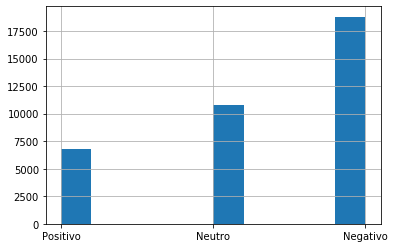

In [5]:
cand1["sentiment"].hist()

In [6]:
cand1

,tweet,sentiment,date,likes_count,retweets_count,hashtags
0,"Assisti umas 20 vezes, top,um dos melhores fil...",Positivo,2020-02-18,0,0,[]
1,Eu acho que fui muito específica 🤷🏾‍♀️,Positivo,2020-02-18,0,0,[]
2,Tatiane Melo,Neutro,2020-02-18,1,0,[]
3,Poderia sair 2\n.\n@BabuSantana e Lucas \nSeri...,Positivo,2020-02-18,0,0,[]
4,Qual o nome dela???,Neutro,2020-02-18,0,0,[]
...,...,...,...,...,...,...
36374,Babu cancelado ok? @HeartOnVenus1 #BBB20 #RedeBBB,Neutro,2020-02-16,1,0,"['#bbb20', '#redebbb']"
36375,"Não to aguentando mais a voz do Babu, sei lá j...",Negativo,2020-02-16,2,0,['#bbb20']
36376,Babu falou que é o único da quebrada \n\nAí o ...,Neutro,2020-02-16,40,5,['#bbb20']
36377,Guilherme e Babu palestrantes #BBB20,Neutro,2020-02-16,1,0,['#bbb20']


# Victor Hugo

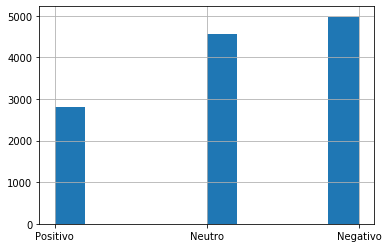

In [7]:
cand2["sentiment"].hist()

In [8]:
cand2

,tweet,sentiment,date,likes_count,retweets_count,hashtags
0,Eu acho que fui muito específica 🤷🏾‍♀️,Positivo,2020-02-18,0,0,[]
1,Tatiane Melo,Neutro,2020-02-18,1,0,[]
2,Qual o nome dela???,Neutro,2020-02-18,0,0,[]
3,Gente que mulher maravilhosaaaa é essa na foto...,Positivo,2020-02-18,2,0,[]
4,É sim. Pesquisei agora.,Neutro,2020-02-18,0,0,[]
...,...,...,...,...,...,...
12341,GUILHERME TA DOIDO PRA VOTAR NO VICTOR HUGO ME...,Negativo,2020-02-16,0,0,['#bbb20']
12342,Esse cuzao vai vota no Victor Hugo #BBB20,Positivo,2020-02-16,0,0,['#bbb20']
12343,"Lucas, Babu,Daniel e Victor Hugo podiam dar as...",Negativo,2020-02-16,4,1,['#bbb20']
12344,"A THELMA FALANDO ""SEM PALESTRINHA DEPOIS DA VO...",Neutro,2020-02-16,19,1,['#bbb20']


# Lucas (Eliminado)

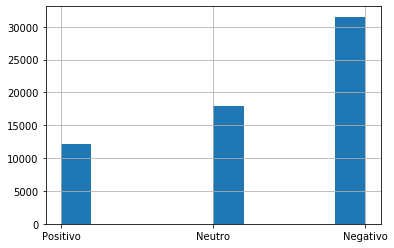

In [9]:
cand3["sentiment"].hist()

In [10]:
cand3

,tweet,sentiment,date,likes_count,retweets_count,hashtags
0,"DESCULPE AMIGO , TE RESPEITO MUITO E GOSTO DAS...",Positivo,2020-02-18,1,0,[]
1,"Vou continuar votando , na verdade eu também...",Neutro,2020-02-18,0,0,[]
2,Sdds de Dibella!,Positivo,2020-02-18,0,0,[]
3,Kkkkk empate? Vou correr lá agora e ajudar a d...,Negativo,2020-02-18,11,1,['#foralucas']
4,flopou,Neutro,2020-02-18,0,0,[]
...,...,...,...,...,...,...
61655,"Babu: ""Só tem eu aqui da quebrada.""\n(...)\nLu...",Neutro,2020-02-16,10,1,['#bbb20']
61656,Primeiro o Px quis dar uma de Lucas palestrinh...,Neutro,2020-02-16,1,0,['#bbb20']
61657,Babu falou que é o único da quebrada \n\nAí o ...,Neutro,2020-02-16,40,5,['#bbb20']
61658,Fazendo um miojao pra ver o babacao do Lucas i...,Negativo,2020-02-16,2,0,['#bbb20']


# Quantidades absolutas

In [11]:
candidates = {"babu": cand1, "victor_hugo": cand2, "lucas": cand3}

In [12]:
qtds_df = get_raw_quantities(candidates)

In [13]:
qtds_df

,positivos,neutros,negativos
nome,,,
babu,6766,10814,18799
victor_hugo,2807,4560,4979
lucas,12173,17964,31523


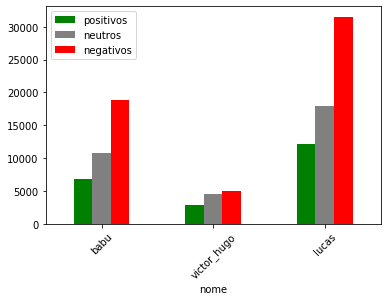

In [14]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação aos total de tweets de cada candidato

In [15]:
pcts_df = get_pct_by_candidate(candidates)

In [16]:
pcts_df

,positivos,neutros,negativos
nome,,,
babu,0.185986,0.297259,0.516754
victor_hugo,0.227361,0.369350,0.403289
lucas,0.197421,0.291340,0.511239


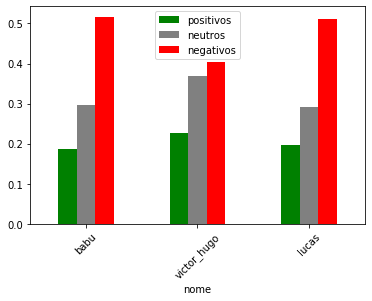

In [17]:
pcts_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação ao total de tweets por categoria

In [18]:
qtds_df_copy = qtds_df.copy()

In [19]:
qtds_df["positivos"] /= qtds_df["positivos"].sum() 
qtds_df["neutros"] /= qtds_df["neutros"].sum()
qtds_df["negativos"] /= qtds_df["negativos"].sum()

In [20]:
qtds_df

,positivos,neutros,negativos
nome,,,
babu,0.311138,0.324375,0.339940
victor_hugo,0.129081,0.136781,0.090035
lucas,0.559781,0.538845,0.570026


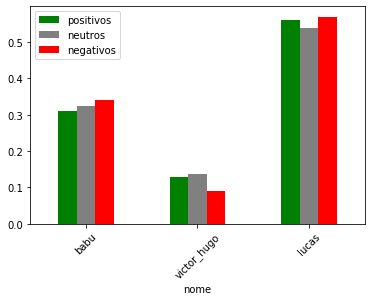

In [21]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Tweets por dia

In [22]:
names = list(candidates.keys())
tweets_by_day_df = get_tweets_by_day(candidates[names[0]], names[0])
for name in names[1:]:
    current = get_tweets_by_day(candidates[name], name)
    tweets_by_day_df = tweets_by_day_df.append(current)

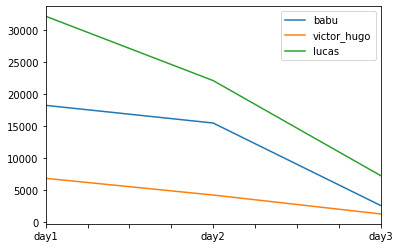

In [23]:
tweets_by_day_df.transpose().plot()

# Análise de hashtags

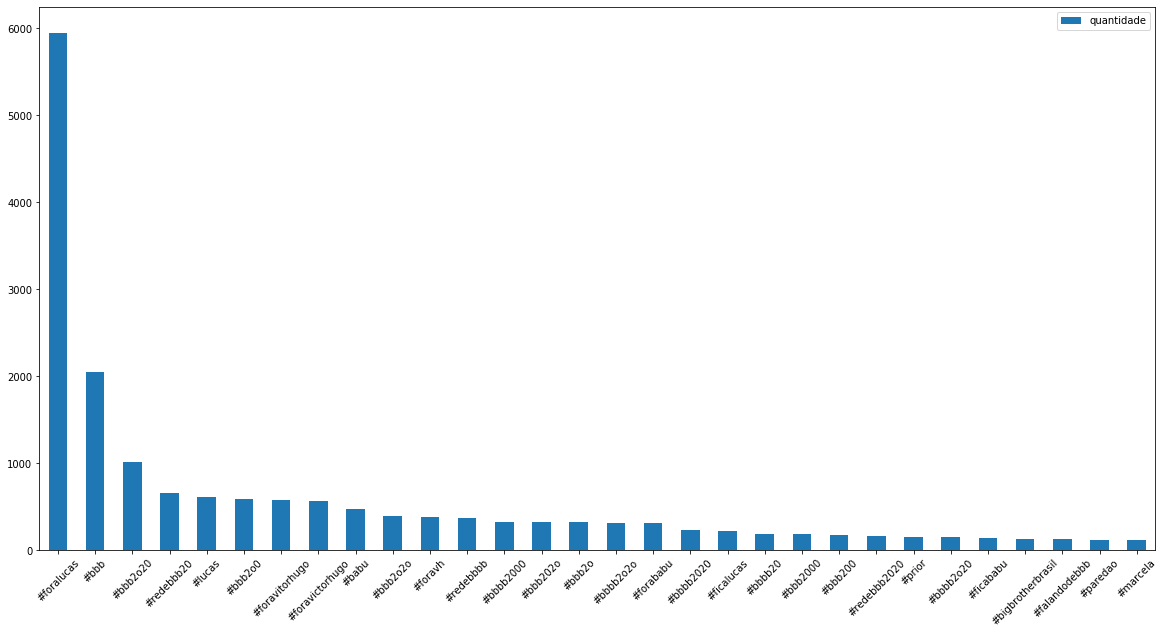

In [24]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

unique_df = get_unique_hashtags(list(candidates.values()))
unique_df.drop(index=IGNORE_HASHTAGS, inplace=True)
unique_df.sort_values(by="quantidade", ascending=False).head(30).plot.bar(rot=45)

In [25]:
alias = {"babu": "babu", "victor_hugo": "victorhugo", "lucas": "lucas"}
fica_fora_df = get_fica_fora_quantities(unique_df, alias)


In [26]:
fica_fora_df

,fica,fora
babu,136,315
victor_hugo,51,570
lucas,218,5952


# Seleção de atributos

In [27]:
atributes_df = qtds_df_copy.join(pcts_df, rsuffix="_individual_pct")
atributes_df = atributes_df.join(qtds_df, rsuffix="_global_pct")
atributes_df = atributes_df.join(tweets_by_day_df)
atributes_df = atributes_df.join(fica_fora_df)

In [28]:
raw_participantes_info = get_participantes_info()[DATE]
print("Seguidores atualizados em:", raw_participantes_info["date"])

Seguidores atualizados em: 25-03-2020


In [29]:
participantes_info = raw_participantes_info["infos"]
paredoes_info = get_paredoes_info()

In [30]:
followers = [participantes_info[participante]["seguidores"] for participante in atributes_df.index]


In [31]:
likes = [get_likes_count(candidates[participante]) for participante in atributes_df.index]

In [32]:
retweets = [get_retweets_count(candidates[participante]) for participante in atributes_df.index]

In [33]:
paredao_info = paredoes_info[PAREDAO]["candidatos"]
results_info = {candidate["nome"]: candidate["porcentagem"]/100 for candidate in paredao_info}
rejection = [results_info[participante] for participante in atributes_df.index]

In [34]:
atributes_df["likes"] = likes
atributes_df["retweets"] = retweets
atributes_df["seguidores"] = followers
atributes_df["rejeicao"] = rejection

In [35]:
atributes_df

,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,fica,fora,likes,retweets,seguidores,rejeicao
nome,,,,,,,,,,,,,,,,,,
babu,6766,10814,18799,0.185986,0.297259,0.516754,0.311138,0.324375,0.339940,18271,15505,2603,136,315,614605,87114,325345,0.0130
victor_hugo,2807,4560,4979,0.227361,0.369350,0.403289,0.129081,0.136781,0.090035,6845,4229,1272,51,570,259802,43392,14399,0.3608
lucas,12173,17964,31523,0.197421,0.291340,0.511239,0.559781,0.538845,0.570026,32223,22154,7283,218,5952,1337004,250861,23670,0.6262


In [36]:
atributes_df.to_csv("data/{}/paredao_atributes.csv".format(PAREDAO))